In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random
from tensorflow.keras.datasets import fashion_mnist


These are hypertuning parameters and regularization parameters.

In [0]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

**We now load the data**

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

Sample display

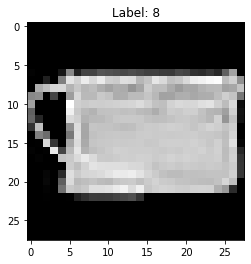

In [10]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

Data preparation

In [11]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Defining the model.

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5336 - accuracy: 0.8121 - val_loss: 0.3501 - val_accuracy: 0.8721
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3540 - accuracy: 0.8738 - val_loss: 0.2969 - val_accuracy: 0.8927
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3064 - accuracy: 0.8902 - val_loss: 0.2609 - val_accuracy: 0.9066
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2724 - accuracy: 0.9003 - val_loss: 0.2500 - val_accuracy: 0.9079
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2469 - accuracy: 0.9099 - val_loss: 0.2382 - val_accuracy: 0.9116
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2249 - accuracy: 0.9158 - val_loss: 0.2232 - val_accuracy: 0.9196
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2109 - accuracy: 0.9231 - val_loss: 0.2145 - val_accuracy: 0.9212
Epoch 

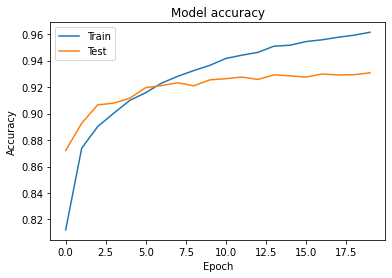

In [14]:
#training the model

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Prediction.**

This cell randomly chooses an image and shows the label.

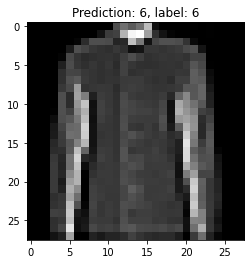

In [21]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

Error Analysis.


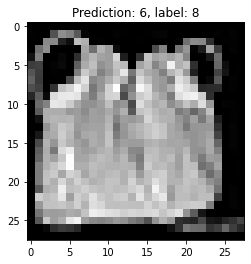

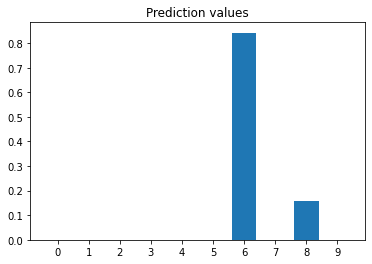

In [24]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()